# Moving Averge-based Trading Strategies

## Fetching Data from CryptoCompare

In [1]:
import requests
import json
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

from datetime import datetime
import time

# ----- User Settings 
#coins=['BTC', 'ETH','LTC','MKR','AAVE', 'BAL', 'UNI', 'LDO', 'MATIC','LINK']
coins=['BTC', 'ETH','LTC','LINK']

trading_fee = 0.5/100 
collectDataFrom = pd.Timestamp('2022-01-01')
trading_range = [+0.02,+2]
#buyAbove='sma7d'
#buyAbove='sma50d'
#buyAbove='sma200d'
buyAbove='sma200w'

cryptocompare_api_key='777db0605f662ba6667a0c8d385d317262bd221764d4a3b01dc7a629e9592a49'


# ----- User Settings -- end

coin_colors = {
    'BTC':'orange',
    'ETH':'grey',
    'AAVE':'purple',
    'LTC':'lightblue',
    'MKR':'lightgreen',
    'MATIC':'blue',
    'UNI':'pink',
    'LDO':'darkred',
    'BAL':'brown',
    'LQTY':'teal',
    'BIFI' :'lightgrey',
    'LINK' : 'darkblue'
}

initial_coin = 1
initial_usd = 0
limit=2000

coin_dfs=[]
for coin in coins:
    time_segments = []
    timestamp = pd.Timestamp.now()
    while collectDataFrom <= timestamp : 
        requestString = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym={}&tsym=USD&limit={}&api_key={}&toTs={}'\
        .format(coin, limit, cryptocompare_api_key, timestamp.timestamp())
        print("Request : " + requestString)    
        response = requests.get(requestString).text 
        parsed = json.loads(response)
        segment_df = pd.DataFrame(parsed['Data']['Data'])
        segment_df['time'] = pd.to_datetime(segment_df['time'], unit='s')
        segment_df.set_index(['time'],inplace=True, verify_integrity = True, drop = True)
        segment_df.sort_index()

        #segment_df.drop_duplicates(inplace=True)
        timestamp = segment_df.first_valid_index() - pd.Timedelta(1, "d") # -1 day        
        #segment_df= segment_df.head(1)
        time_segments.append(segment_df)
          
    df = pd.concat(time_segments, axis=0)
    df = pd.concat({coin: df}, axis=1, names=["Coin", "Metrics"])
    df.drop_duplicates(inplace=True)
    df.drop(columns=['volumefrom','volumeto','conversionType','conversionSymbol'], level='Metrics', inplace=True)
    coin_dfs.append(df)
df=pd.concat(coin_dfs, axis=1)
df=df.loc[collectDataFrom:]
df.sort_index(inplace=True)
df


Request : https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=2000&api_key=777db0605f662ba6667a0c8d385d317262bd221764d4a3b01dc7a629e9592a49&toTs=1677703775.341062
Request : https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=2000&api_key=777db0605f662ba6667a0c8d385d317262bd221764d4a3b01dc7a629e9592a49&toTs=1677703776.449674
Request : https://min-api.cryptocompare.com/data/v2/histoday?fsym=LTC&tsym=USD&limit=2000&api_key=777db0605f662ba6667a0c8d385d317262bd221764d4a3b01dc7a629e9592a49&toTs=1677703778.124766
Request : https://min-api.cryptocompare.com/data/v2/histoday?fsym=LINK&tsym=USD&limit=2000&api_key=777db0605f662ba6667a0c8d385d317262bd221764d4a3b01dc7a629e9592a49&toTs=1677703779.554489


Coin             BTC                                    ETH                    \
Metrics         high       low      open     close     high      low     open   
time                                                                            
2022-01-01  47950.29  46196.03  46197.31  47737.35  3777.06  3675.15  3675.79   
2022-01-02  47979.26  46666.18  47737.35  47306.41  3854.47  3718.46  3766.74   
2022-01-03  47572.23  45707.55  47306.41  46450.79  3850.72  3682.61  3830.92   
2022-01-04  47529.48  45587.91  46450.79  45824.54  3891.61  3714.62  3765.16   
2022-01-05  47067.18  42510.86  45824.54  43432.51  3847.65  3424.77  3785.67   
...              ...       ...       ...       ...      ...      ...      ...   
2023-02-25  23217.24  22809.89  23189.78  23167.45  1608.73  1560.62  1607.86   
2023-02-26  23673.78  23068.21  23167.45  23557.39  1648.88  1588.49  1594.76   
2023-02-27  23876.65  23144.28  23557.39  23490.07  1664.42  1609.58  1641.47   
2023-02-28  23596.23  23039.39  23490.07  23134.20  1647.24  1598.81  1633.45   
2023-03-01  23962.77  23037.24  23134.20  23524.29  1669.00  1597.20  1604.71   

Coin                    LTC                            LINK                  \
Metrics       close    high     low    open   close    high     low    open   
time                                                                          
2022-01-01  3766.74  150.98  146.15  146.16  150.82  20.790  19.510  19.510   
2022-01-02  3830.92  153.29  147.92  150.82  151.18  22.210  20.580  20.750   
2022-01-03  3765.16  151.18  146.07  151.18  148.42  23.780  21.260  21.880   
2022-01-04  3785.67  151.56  145.33  148.42  146.51  24.470  22.790  23.720   
2022-01-05  3536.77  149.89  129.98  146.51  135.27  27.450  22.380  23.430   
...             ...     ...     ...     ...     ...     ...     ...     ...   
2023-02-25  1594.76   93.48   90.46   91.58   93.16   7.492   7.188   7.466   
2023-02-26  1641.47   95.50   92.80   93.16   95.27   7.542   7.296   7.376   
2023-02-27  1633.45   96.04   92.51   95.27   94.09   7.503   7.135   7.497   
2023-02-28  1604.71   96.00   93.09   94.09   93.77   7.421   7.102   7.274   
2023-03-01  1647.48   98.28   93.62   93.77   97.19   7.504   7.152   7.194   

Coin                
Metrics      close  
time                
2022-01-01  20.750  
2022-01-02  21.880  
2022-01-03  23.720  
2022-01-04  23.430  
2022-01-05  25.210  
...            ...  
2023-02-25   7.376  
2023-02-26   7.497  
2023-02-27   7.274  
2023-02-28   7.194  
2023-03-01   7.412  

[425 rows x 16 columns]

## Narrowing Input and Refining Input Parameters

In [2]:
# ----- User Settings Overrides
#coins=['BTC', 'ETH','LTC','MKR','AAVE', 'BAL', 'UNI', 'LDO', 'MATIC','LINK']
coins=['ETH','BTC','LTC']

trading_fee = 0.5/100 
trading_range = [+0.02,+2]
#buyAbove='sma7d'
#buyAbove='sma50d'
#buyAbove='sma200d'
buyAbove='sma200w'
# df=df.loc['2020-01-01':]

## Adding Extra Columns

In [3]:
for coin in coins:
    
    # Adding Simple Moving Average Columns
    df.loc(axis=1)[(coin,'sma7d')] = df.loc(axis=1)[(coin,'close')].rolling(7).mean()
    df.loc(axis=1)[(coin,'sma50d')] = df.loc(axis=1)[(coin,'close')].rolling(50).mean()
    df.loc(axis=1)[(coin,'sma200d')] = df.loc(axis=1)[(coin,'close')].rolling(200).mean()
    df.loc(axis=1)[(coin,'sma200w')] = df.loc(axis=1)[(coin,'close')].rolling(200*7).mean()
    # Adding ExponentialMoving Average Columns
    #df.loc(axis=1)[(coin,'ema21w')] = df.loc(axis=1)[(coin,'close')].ewm(span=21*7, adjust=False).mean()
    
    # Setting Initial coins

    df.loc(axis=1)[(coin,'usd_bag')] = initial_usd;
    df.loc(axis=1)[(coin,'coin_bag')] = initial_coin;
df.sort_index(axis=1,inplace=True, level='Coin',sort_remaining=False)
df['ETH']




Metrics,high,low,open,close,sma7d,sma50d,sma200d,sma200w,usd_bag,coin_bag
time,,,,,,,,,,
2022-01-01,3777.06,3675.15,3675.79,3766.74,NaN,NaN,NaN,NaN,0,1
2022-01-02,3854.47,3718.46,3766.74,3830.92,NaN,NaN,NaN,NaN,0,1
2022-01-03,3850.72,3682.61,3830.92,3765.16,NaN,NaN,NaN,NaN,0,1
2022-01-04,3891.61,3714.62,3765.16,3785.67,NaN,NaN,NaN,NaN,0,1
2022-01-05,3847.65,3424.77,3785.67,3536.77,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...
2023-02-25,1608.73,1560.62,1607.86,1594.76,1648.701429,1572.9568,1438.89820,NaN,0,1
2023-02-26,1648.88,1588.49,1594.76,1641.47,1643.018571,1580.5090,1437.83530,NaN,0,1
2023-02-27,1664.42,1609.58,1641.47,1633.45,1633.007143,1587.4056,1436.59725,NaN,0,1


## Calculate Trading Strategy Results

In [4]:


def trade_by_above_ma(row, ma_column='sma7d'):

    isAboveSMA = row['close'] > row[ma_column]
    coin_bag = row['coin_bag']
    usd_bag = row['usd_bag']
    if pd.isna(row['close']):
        return coin_bag, usd_bag 
    if isAboveSMA == True:  # Buy
        if usd_bag>0:
            coin_bag =  row['coin_bag'] + (1-trading_fee) * row['usd_bag']/row['close']  
            usd_bag = 0
    else:                   # Sell
        if coin_bag>0: 
            usd_bag = row['usd_bag'] + (1-trading_fee) * row['coin_bag']*row['close']
            coin_bag = 0
    return coin_bag, usd_bag 


def trade_by_ma_range(row, ma_column='sma7d', trading_range = [-0.1,+0.1] ):
    
    coin_bag = row['coin_bag']
    usd_bag = row['usd_bag']
    if pd.isna(row['close']):
        return coin_bag, usd_bag 
    if row['close'] < (1+trading_range[0])*row[ma_column] :    
        if usd_bag>0:  # Buy
            coin_bag =  row['coin_bag'] + (1-trading_fee) * row['usd_bag']/row['close']  
            usd_bag = 0
    else :
        if row['close'] > (1+trading_range[1])*row[ma_column] :
            if coin_bag>0: # Sell
                usd_bag = row['usd_bag'] + (1-trading_fee) * row['coin_bag']*row['close']
                coin_bag = 0
    return coin_bag, usd_bag 



for coin in coins:
    
    usd_bag=initial_usd
    coin_bag=initial_coin

    for index, row in df[coin].iterrows():

        row['coin_bag'] = coin_bag
        row['usd_bag'] = usd_bag
        #coin_bag, usd_bag = trade_by_above_ma(row, ma_column=buyAbove)
        coin_bag, usd_bag = trade_by_ma_range(row, ma_column=buyAbove, trading_range=trading_range )
        #df[coin].loc[index,'coin_bag'] = coin_bag
        df.loc[index,(coin,'coin_bag')] = coin_bag
        df.loc[index,(coin,'usd_bag')] = usd_bag
        #df[coin].loc[index,'usd_bag'] = usd_bag
    # df[coin]['usd_value'] = df[coin]['usd_bag'] + df[coin]['coin_bag']*df[coin]['close']
    df.loc(axis=1)[(coin,'trade_usd_value')] = df[coin]['usd_bag'] + df[coin]['coin_bag']*df[coin]['close']
    df.loc(axis=1)[(coin,'hodl_usd_value')] = df[coin]['close']*initial_coin + initial_usd
    df.loc(axis=1)[(coin,'trade_success_rate')] = df[coin]['trade_usd_value'] / df[coin]['hodl_usd_value'] 

df.sort_index(axis=1,inplace=True, level='Coin',sort_remaining=False)
df

Coin             BTC                                                          \
Metrics         high       low      open     close         sma7d      sma50d   
time                                                                           
2022-01-01  47950.29  46196.03  46197.31  47737.35           NaN         NaN   
2022-01-02  47979.26  46666.18  47737.35  47306.41           NaN         NaN   
2022-01-03  47572.23  45707.55  47306.41  46450.79           NaN         NaN   
2022-01-04  47529.48  45587.91  46450.79  45824.54           NaN         NaN   
2022-01-05  47067.18  42510.86  45824.54  43432.51           NaN         NaN   
...              ...       ...       ...       ...           ...         ...   
2023-02-25  23217.24  22809.89  23189.78  23167.45  24008.767143  22181.4076   
2023-02-26  23673.78  23068.21  23167.45  23557.39  23904.461429  22313.7008   
2023-02-27  23876.65  23144.28  23557.39  23490.07  23711.887143  22441.1860   
2023-02-28  23596.23  23039.39  23490.07  23134.20  23523.844286  22560.2894   
2023-03-01  23962.77  23037.24  23134.20  23524.29  23429.182857  22681.9264   

Coin                                              ...     LTC             \
Metrics         sma200d sma200w usd_bag coin_bag  ...   close      sma7d   
time                                              ...                      
2022-01-01          NaN     NaN       0        1  ...  150.82        NaN   
2022-01-02          NaN     NaN       0        1  ...  151.18        NaN   
2022-01-03          NaN     NaN       0        1  ...  148.42        NaN   
2022-01-04          NaN     NaN       0        1  ...  146.51        NaN   
2022-01-05          NaN     NaN       0        1  ...  135.27        NaN   
...                 ...     ...     ...      ...  ...     ...        ...   
2023-02-25  19751.76695     NaN       0        1  ...   93.16  94.540000   
2023-02-26  19749.75555     NaN       0        1  ...   95.27  94.225714   
2023-02-27  19747.48910     NaN       0        1  ...   94.09  93.964286   
2023-02-28  19741.09925     NaN       0        1  ...   93.77  93.960000   
2023-03-01  19736.47140     NaN       0        1  ...   97.19  94.242857   

Coin                                                                    \
Metrics      sma50d   sma200d sma200w usd_bag coin_bag trade_usd_value   
time                                                                     
2022-01-01      NaN       NaN     NaN       0        1          150.82   
2022-01-02      NaN       NaN     NaN       0        1          151.18   
2022-01-03      NaN       NaN     NaN       0        1          148.42   
2022-01-04      NaN       NaN     NaN       0        1          146.51   
2022-01-05      NaN       NaN     NaN       0        1          135.27   
...             ...       ...     ...     ...      ...             ...   
2023-02-25  91.6084  69.14280     NaN       0        1           93.16   
2023-02-26  91.9866  69.31110     NaN       0        1           95.27   
2023-02-27  92.2972  69.47210     NaN       0        1           94.09   
2023-02-28  92.5400  69.62615     NaN       0        1           93.77   
2023-03-01  92.8662  69.79290     NaN       0        1           97.19   

Coin                                          
Metrics    hodl_usd_value trade_success_rate  
time                                          
2022-01-01         150.82                1.0  
2022-01-02         151.18                1.0  
2022-01-03         148.42                1.0  
2022-01-04         146.51                1.0  
2022-01-05         135.27                1.0  
...                   ...                ...  
2023-02-25          93.16                1.0  
2023-02-26          95.27                1.0  
2023-02-27          94.09                1.0  
2023-02-28          93.77                1.0  
2023-03-01          97.19                1.0  

[425 rows x 43 columns]

## Showing Results

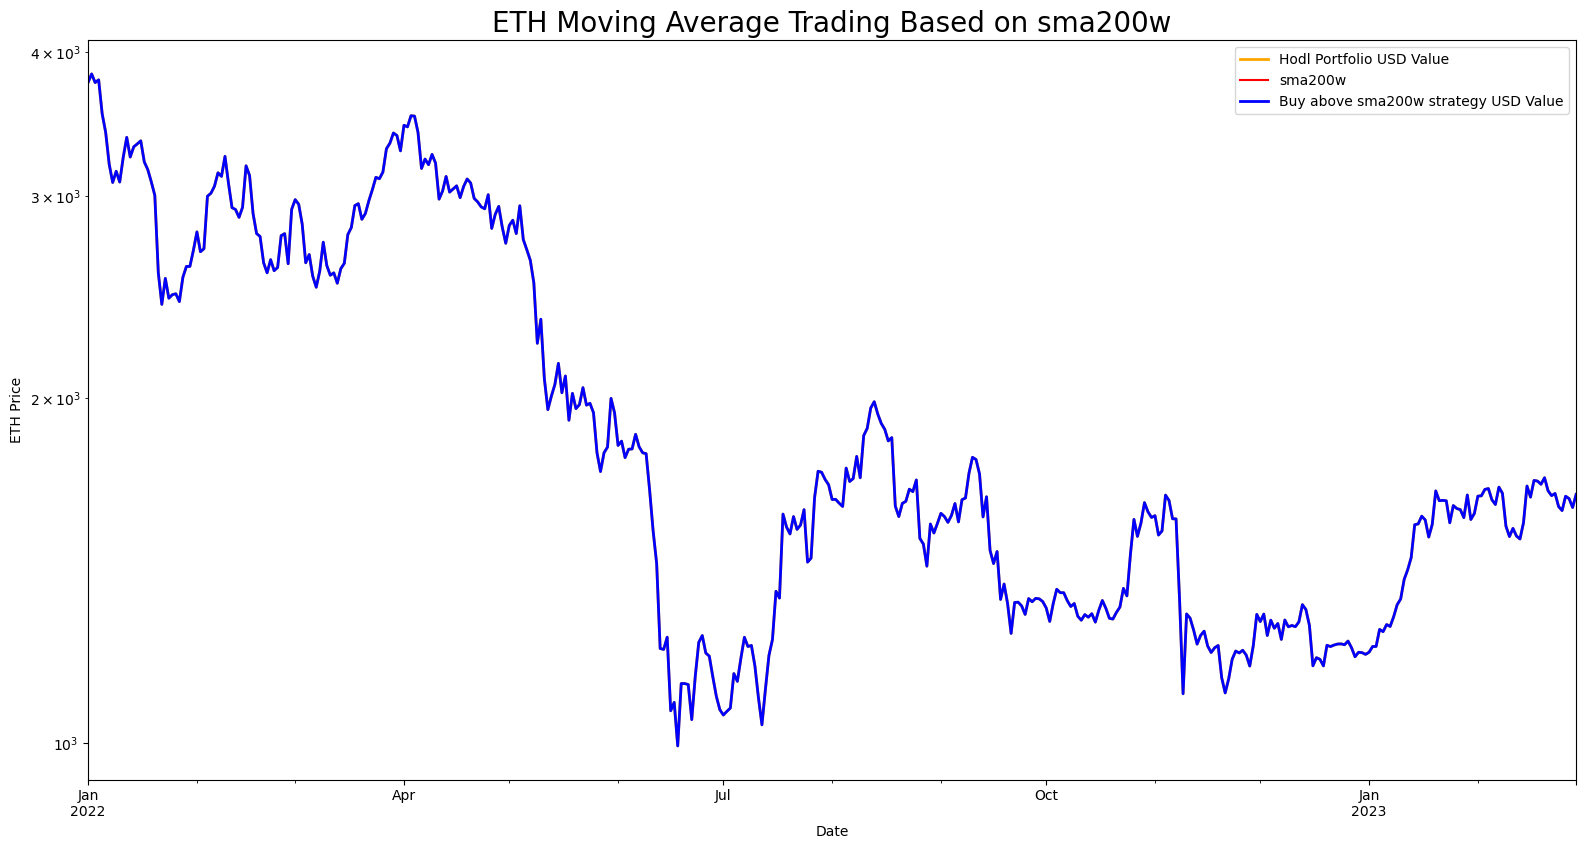

In [5]:

import matplotlib.pyplot as plot

coin='ETH'
df[coin]['close'].plot(c='orange',label='Hodl Portfolio USD Value',linewidth=2)
df[coin][buyAbove].plot(c='red',label=buyAbove)
df[coin]['trade_usd_value'].plot(c='blue',label='Buy above {} strategy USD Value'.format(buyAbove),linewidth=2)


plot.title("{} Moving Average Trading Based on {}".format(coin, buyAbove), fontsize=20)
plot.ylabel("{} Price".format(coin))
plot.xlabel('Date')
plot.legend()
plot.yscale('log')
F = plot.gcf()

# Now check everything with the defaults:
#DPI = F.get_dpi()
#print ("DPI:", DPI)
DefaultSize = F.get_size_inches()
#print ("Default size in Inches", DefaultSize)
#print ("Which should result in a %i x %i Image"%(DPI*DefaultSize[0], DPI*DefaultSize[1]))
# the default is 100dpi for savefig:
#F.savefig("test1.png")
# this gives me a 797 x 566 pixel image, which is about 100 DPI

# Now make the image twice as big, while keeping the fonts and all the
# same size
F.set_size_inches( (DefaultSize[0]*3, DefaultSize[1]*2) )

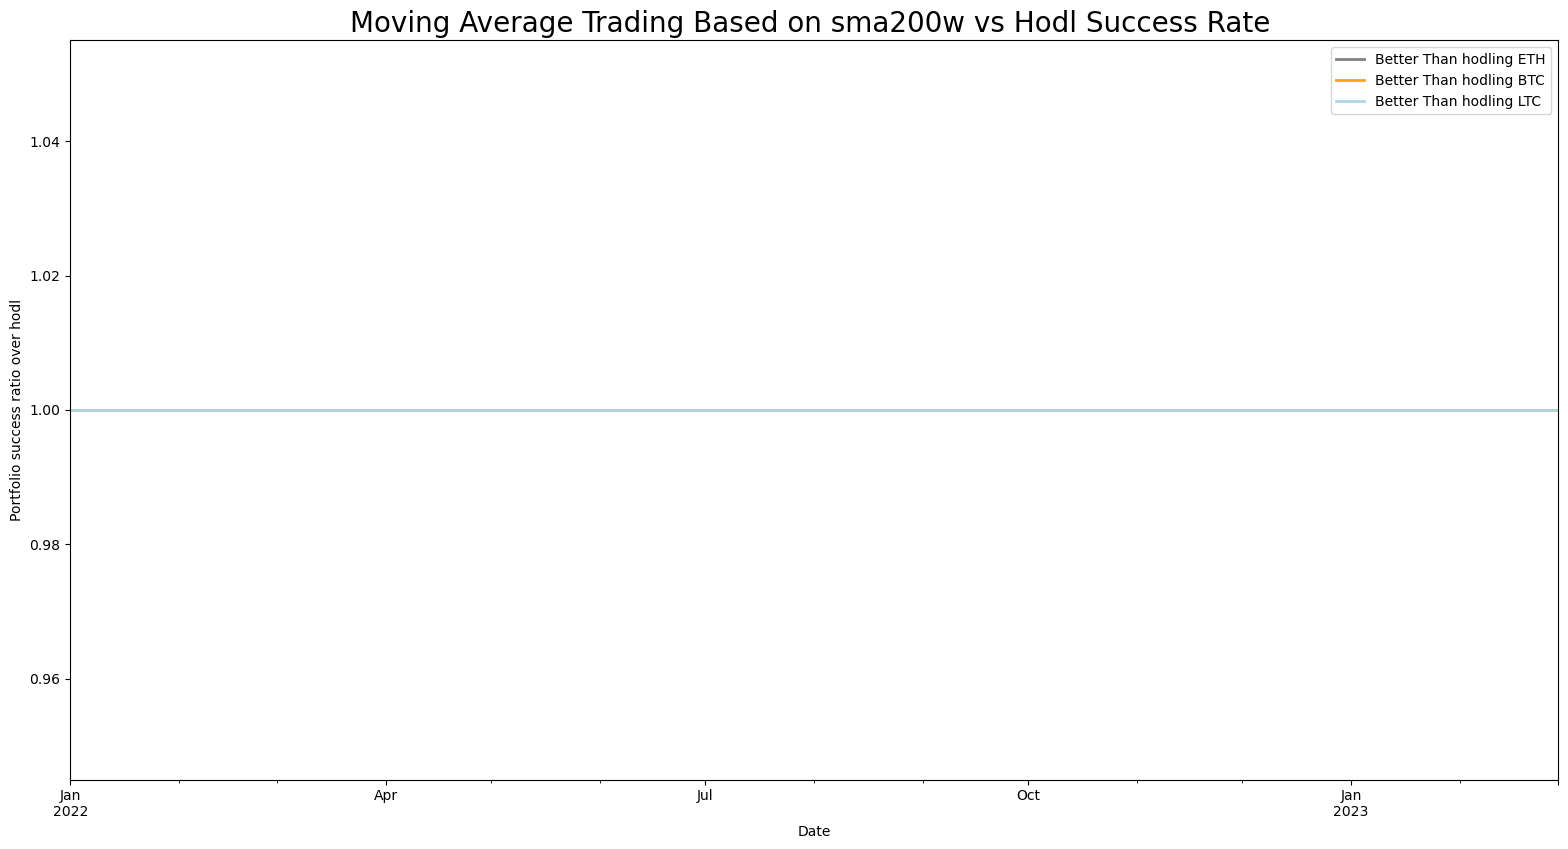

In [6]:

for coin in coins:
    df[coin]['trade_success_rate'].plot(c=coin_colors[coin],label="Better Than hodling {}".format(coin),linewidth=2)

plot.title("Moving Average Trading Based on {} vs Hodl Success Rate ".format(buyAbove), fontsize=20)
plot.ylabel("Portfolio success ratio over hodl")
plot.xlabel('Date')
plot.legend()
F = plot.gcf()
DefaultSize = F.get_size_inches()

F.set_size_inches( (DefaultSize[0]*3, DefaultSize[1]*2) )

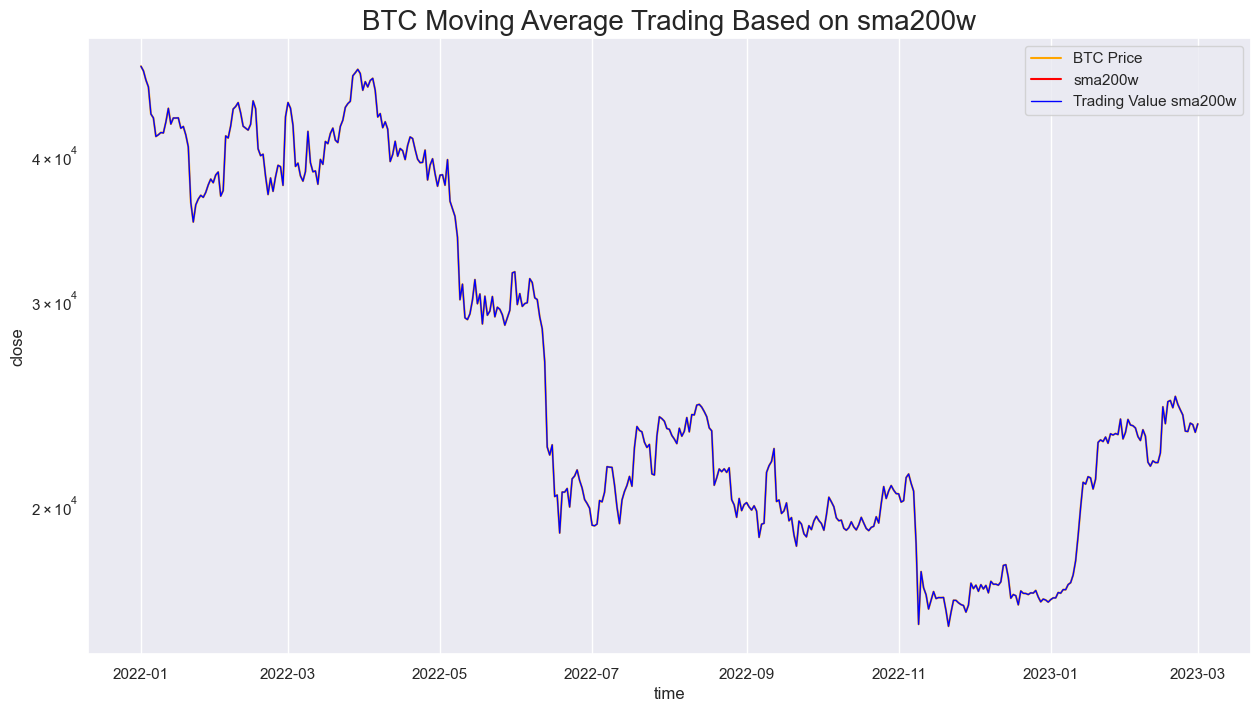

In [7]:
# Apply the default theme
import seaborn as sns
coin='BTC'
sns.set_theme( palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})

plot.title("{} Moving Average Trading Based on {}".format(coin, buyAbove), fontsize=20)
g_results=sns.lineplot(data=df[coin], x=df[coin].index, y=df[coin]['close'], color=coin_colors[coin],label='{} Price'.format(coin))
g_results=sns.lineplot(data=df[coin], x=df[coin].index, y=df[coin][buyAbove], color='red', label=buyAbove)
g_results=sns.lineplot(data=df[coin], x=df[coin].index, y=df[coin]['trade_usd_value'], color='blue', label='Trading Value {}'.format(buyAbove),linewidth=1)

g_results.set(yscale='log')
plot.legend()